In [9]:
import pandas as pd
import numpy as np
import requests
import json

In [10]:
def get_access_token(url, params):
    url = "https://entreprise.pole-emploi.fr/connexion/oauth2/access_token?realm=/%2Fpartenaire"
    headers = {
        'Content-Type': 'application/x-www-form-urlencoded'
    }



    response_token = requests.post(url,
                            headers=headers,
                            params=params,
                            timeout=25
                            )
    response_token.close()

    bytes_response_token = response_token.content.decode('utf8').replace("'", '"')
    json_response_token = json.loads(bytes_response_token)
    return(json_response_token.get("access_token"))

params = {
    "grant_type": "client_credentials",
    "client_id": "PAR_projetds_ab7f9c4312021e5eef9a6dd1598b31a6ff2359766f66e233994a2ebca72ddab9",
    "client_secret": "00b21ca69d191237497a1fcb2ad08c848a9304c4b4a80fea87cbf675de6b3a25",
    "scope": "api_infotravailv1"
}
access_token = get_access_token(url = "https://entreprise.pole-emploi.fr/connexion/oauth2/access_token?realm=/%2Fpartenaire", 
                params=params)
def get_list_of_bdd(url, access_token):

    headers = {
        'Authorization': f'Bearer {access_token}'
    }
    response_liste_BDD = requests.get(url,headers=headers, timeout=25)

#     print(dir(response_liste_BDD))

    bytes_response_liste_BDD = response_liste_BDD.content.decode('utf8').replace("'", '"')
    # print(f"bytes_response_liste_BDD : {bytes_response_liste_BDD}")
    json_response_liste_BDD = json.loads(bytes_response_liste_BDD)
    # print(json_response_liste_BDD)
    print("\n")
    # print_dict_like_json_prettify(json_response_liste_BDD, 4)

    print(json_response_liste_BDD.get("result").keys())

    # print(len([dic for dic in json_response_liste_BDD.get("result").get("packages") if dic.get("type")=="dataset"]))
    list_dataset_dic = [dic for dic in json_response_liste_BDD.get("result").get("packages") if dic.get("type")=="dataset"]
    # [print(f"\n\n{print_dict_like_json_prettify(e,4)}") for e in list_dataset_dic if list(e) in ["id", "title", "notes"]]
    # [print(f"\n\n{list(e)}") for e in list_dataset_dic]


    # for dic in list_dataset_dic:
    #     for key, val in dic.items():
    # #         print(key)
    # #         if key == "id": 
    # #             print(key, val)
    #         if key == "tilte" :  
    #             print(key, val)
    #         if key == "note" :
    #             print(key, val)
    print([e for e in range(len(list_dataset_dic))])

    list_dataset_dic_ft=list()
    for e in range(len(list_dataset_dic)):
        list_dataset_dic_ft.append({your_key: list_dataset_dic[e][your_key] for your_key in ["id", "title", "notes"] })
    #     print("\n")
    [print(f"{e}\n") for e in list_dataset_dic_ft]
    return(list_dataset_dic_ft)
    
get_list_of_bdd(url="https://api.emploi-store.fr/partenaire/infotravail/v1/organization_show?id=digidata",
                access_token=access_token)
# {k: v for k, v in mydict.items() if k.startswith('foo')}

# from collections import ChainMap
# final_map = ChainMap(*list_dataset_dic)
# print(final_map)
# list_dataset_dic_ft = for dic in {k: v for k, v in final_map.items() if k in ["id", "title", "notes"]}
# print(list_dataset_dic_ft)



dict_keys(['users', 'display_name', 'description', 'image_display_url', 'package_count', 'created', 'name', 'is_organization', 'state', 'extras', 'image_url', 'groups', 'type', 'title', 'revision_id', 'packages', 'num_followers', 'id', 'tags', 'approval_status'])
[0, 1, 2, 3, 4, 5]
{'id': '80341a24-a451-49ec-b6b0-1b8756fe977d', 'title': 'Offres d’emploi anonymisées', 'notes': 'Ce jeu de données référence les données anonymisées des offres Pôle emploi. '}

{'id': '445b746a-bbe0-456a-8bee-ea24498242d3', 'title': 'Référentiel des agences Pôle emploi', 'notes': 'Ce jeu de données référence l’ensemble des informations concernant les agences de Pôle emploi : localisation, coordonnées (adresse, téléphone, mail), type d’agence (généraliste, cadre, spectacle), horaires d’ouverture. '}

{'id': 'a4f9e4dd-365e-4542-839c-a93a2448e388', 'title': 'Informations sur le marché du travail', 'notes': 'Ce jeu de données référence les informations relatives au marché du travail : données sur les recruteme

[{'id': '80341a24-a451-49ec-b6b0-1b8756fe977d',
  'title': 'Offres d’emploi anonymisées',
  'notes': 'Ce jeu de données référence les données anonymisées des offres Pôle emploi. '},
 {'id': '445b746a-bbe0-456a-8bee-ea24498242d3',
  'title': 'Référentiel des agences Pôle emploi',
  'notes': 'Ce jeu de données référence l’ensemble des informations concernant les agences de Pôle emploi : localisation, coordonnées (adresse, téléphone, mail), type d’agence (généraliste, cadre, spectacle), horaires d’ouverture. '},
 {'id': 'a4f9e4dd-365e-4542-839c-a93a2448e388',
  'title': 'Informations sur le marché du travail',
  'notes': 'Ce jeu de données référence les informations relatives au marché du travail : données sur les recrutements, statistiques sur les offres et la demande d’emploi.'},
 {'id': '47dbbaba-c983-47df-bd9c-eaeec14bd834',
  'title': 'Statistiques sur le marché du travail',
  'notes': 'Ce jeu de données référence les informations statistiques sur le marché du travail : données stati

In [11]:
def import_ressources(url, access_token):

    pd.set_option('display.max_columns', 500)

    # GET https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM {identifiant_r} LIMIT 5 
    # WHERE \"CITY_NAME\" = \"NANTES\" 
    # WHERE \"DEPARTEMENT_NAME\" = \"LOIRE-ATLANTIQUE\" 
    # AND \"MAXIMUM_SALARY\" > 16000
    # cast(\"MAXIMUM_SALARY\" as float)

    headers = {
        'Authorization': f'Bearer {access_token}'
    }

    response_first_BDD = requests.get(url,headers=headers)

    #     print(dir(response_first_BDD))
    # print(response_first_BDD.content)
    bytes_response_first_BDD = response_first_BDD.content
    # print(bytes_response_first_BDD)
    json_response_first_BDD = json.loads(bytes_response_first_BDD)

    # print_dict_like_json_prettify(json_response_first_BDD, 4)

    json_response_first_BDD.get("result").get("fields")

    # df = pd.DataFrame.from_records(json_response_first_BDD.get("result").get("records"))
    # display(df)

    #     print(json_response_first_BDD.get("result").get("fields"))
    type_dict=dict()
    for elem in json_response_first_BDD.get("result").get("fields"):
        if elem.get("type")=="int4":
            type_dict[elem.get("id")]="int"
        if elem.get("type")=="text":
            type_dict[elem.get("id")]="object"
            
    df = pd.DataFrame.from_dict(json_response_first_BDD.get("result").get("records")).astype(type_dict)
    df = df.drop(["_full_text"], axis=1, errors="ignore").set_index("_id")
    return(df)
            
            
identifiant_r = "e49af0f2-8d00-4a54-9124-2f4107efa810" 
nb_elem_ressources = "500"
offset = "1"
url_ressources = f'https://api.emploi-store.fr/partenaire/infotravail/v1/datastore_search_sql?sql=SELECT * FROM \"{identifiant_r}\" WHERE \"DEPARTEMENT_NAME\" = \'LOIRE-ATLANTIQUE\' AND \"MAXIMUM_SALARY\" <> \'\' LIMIT {nb_elem_ressources}'

import_ressources(url_ressources, access_token)

,DISABLED_ACCESSIBILITY,ROME_PROFESSION_CARD_NAME,TRAVEL_TYPE_COMMENT,TRAVEL_FREQUENCY_NAME,CITY_NAME,LANG_NAME_1,LANG_NAME_2,DEGREE_TYPE_NAME_2,ROME_PROFESSION_CODE,DESKTOP_TOOLS_NAME_1,TRAVEL_FREQUENCY_COMMENT,SUB_CONTINENT_CODE,LANG_CODE_2,COUNTRY_CODE,LANG_CODE_1,EM_INTERVIEW_MODALITY_NAME,EXP_DURATION_TYPE_NAME,NB_MONTH_SALARY,CONTRACT_NATURE_CODE,STATUS_CODE,SALARY_COMMENT,CREATION_DATE,SALARY_TYPE_NAME,CONTRACT_TYPE_NAME,DESKTOP_TOOLS_CODE_1,DESKTOP_TOOLS_CODE_2,WORKING_LOCATION_TYPE_NAME,ACTIVITY_CODE,WEEKLY_WORKING_MINUTES,SERVICE_TYPE_CODE,ROME_PROFESSION_CARD_CODE,DESKTOP_TOOLS_LEV_NAME_2,DESKTOP_TOOLS_LEV_NAME_1,EXPERIENCE_CODE,NB_VACANCIES_CREATION,DEGREE_REQUIRED_CODE_2,DEGREE_REQUIRED_CODE_1,DEPARTEMENT_CODE,CONTINENT_NAME,POSTCODE,ANNUAL_MINIMUM_SALARY,WORKING_HOURS_TYPE_NAME,WAGE_UNIT_NAME,NUMBER_OF_APPLICATION,DEGREE_TYPE_NAME_1,DRIVING_LIC_REQ_CODE_2,DRIVING_LIC_CODE_2,DRIVING_LIC_CODE_1,SALARY_SUPPLEMENT_NAME_2,SALARY_SUPPLEMENT_NAME_1,EMPLOYER_CONSENT,DESKTOP_TOOLS_NAME_2,ROME_PROFESSION_NAME,ACTIVITY_NAME,WORKING_HOURS_TYPE_COMMENT,MONITORING_AGENCY_CODE,CITY_CODE,WORKING_LOCATION_NAME,TRAVEL_TYPE_CODE,EXPERIENCE_NAME,WORKING_LOCATION_TYPE_CODE,MINIMUM_SALARY,LANG_REQUIRED_NAME_2,LANG_REQUIRED_NAME_1,SERVICE_TYPE_NAME,CONTRACT_TYPE_CODE,ANNUAL_MAXIMUM_SALARY,SALARY_TYPE_CODE,CONTRACT_DUR_UNIT_NAME,CONTRACT_NATURE_NAME,DRIVING_LIC_NAME_1,DEGREE_DIPLOMA_NAME_2,DEGREE_DIPLOMA_NAME_1,DRIVING_LIC_NAME_2,QUALIFICATION_NAME,DEGREE_SUBJECT_AREA_NAME_1,DEGREE_SUBJECT_AREA_NAME_2,TRAVEL_TYPE_NAME,WEEKLY_WORKING_HOURS,DRIVING_LIC_REQ_NAME_2,DRIVING_LIC_REQ_NAME_1,WORKING_HOURS_TYPE_CODE,ROME_LIST_SKILL_CODE,REGION_NAME,SUB_CONTINENT_NAME,DEGREE_TYPE_CODE_2,DEGREE_TYPE_CODE_1,COUNTRY_NAME,WORKING_CONDITION_NAME,QUALIFICATION_CODE,LANG_PROFICIENCY_NAME_2,LANG_PROFICIENCY_NAME_1,EXP_DURATION_TYPE_CODE,WORKFORCE,CONTRACT_DURATION,DEPARTEMENT_NAME,FLAG_RELATION,REGION_CODE,ROME_LIST_WORK_ENV_CODE,LANG_REQUIRED_CODE_1,LANG_REQUIRED_CODE_2,LANG_PROFICIENCY_CODE_1,LANG_PROFICIENCY_CODE_2,WORKING_CONDITION_COMMENT,CONTRACT_DUR_UNIT_CODE,ROME_LIST_ACTIVITY_CODE,CONTINENT_CODE,SALARY_UNIT_CODE,EXPERIENCE_MIN_DURATION,SALARY_SUPPLEMENT_CODE_1,MAXIMUM_SALARY,EM_INTERVIEW_MODALITY_CODE,SALARY_SUPPLEMENT_CODE_2,DEGREE_REQUIRED_NAME_1,DEGREE_REQUIRED_NAME_2,DEGREE_SUBJECT_AREA_CODE_2,LATITUDE,DEGREE_SUBJECT_AREA_CODE_1,LONGITUDE,NB_VACANCIES_LEFT,TRAVEL_FREQUENCY_CODE,DRIVING_LIC_REQ_CODE_1,DESKTOP_TOOLS_LEV_CODE_2,MODIFICATION_DATE,STATUS_NAME,WORKING_CONDITION_CODE,DESKTOP_TOOLS_LEV_CODE_1,EXPERIENCE_MAX_DURATION
_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
118649,,Études - modèles en industrie des matériaux so...,APP,,,,,,16715,,,,,01,,0,Mois,12,E1,EC,,27/10/21,Horaire,Interim,,,Une commune,7820Z,,N,H1205,,,E,1,,,44,20930,,,Horaires normaux,Euros,None,,,,,,,None,,Modéliste industriel / industrielle,Activités des agences de travail temporaire,,,,LEGE,MEL,Expérience exigée,CO,10.48,,,2,MIS,,H,Mois,Contrat tout public,,,,,Employé non qualifié,,,Envoyer votre CV par mail,35,,,NOR,,Pays de la Loire,N,,,FRANCE,Autre,5,,,MO,None,3,LOIRE-ATLANTIQUE,1,52,,,,,,,MO,104477;104478;104480;104482;124055,19073.6,EU,2,,11.5,En appui,,,,,None,,None,None,,,,27/10/21,Publiée,AUT,,
118791,,Soins infirmiers généralistes,APP,,,,,,38222,,,,,01,,0,An(s),12,E1,EC,,10/11/21,Mensuel,CDI,,,Une commune,8710A,,N,J1506,,,E,1,,E,44,24000,,,Horaires normaux,Euros,None,"Bac+3, Bac+4 ou équivalent",,,,,CE,None,,Infirmier / Infirmière en gériatrie,Hébergement médicalisé pour personnes âgées,,,,LA MONTAGNE,MEL,Expérience exigée,CO,1900,,,2,CDI,,M,,Contrat tout public,,,IDE,,Employé qualifié,Infirmier,,Envoyer votre CV par mail,28,,,NOR,,Pays de la Loire,N,,NV2,FRANCE,Autre,6,,,AN,None,,LOIRE-ATLANTIQUE,1,52,,,,,,,,107736;107737;107738;107739;107740,22800,EU,2,9,2000,En appui,,exigé,,,None,43448,None,None,,,,10/11/21,Publiée,AUT,,
118973,,Personnel de cuisine,APP,,,,,,19354,,,,,01,

In [4]:
df = pd.DataFrame.from_dict(json_response_first_BDD.get("result").get("records")).astype(type_dict)
df = df.drop(["_full_text"], axis=1, errors="ignore").set_index("_id")
# df_{i} | name : {e.get("name")} | description : {e.get("description")} | id : {e.get("id")}')
print(df.shape)
display(df.head(15))

NameError: name 'json_response_first_BDD' is not defined

In [58]:
# df.to_csv("test_diff_null.csv")
df = pd.read_csv('test_diff_null.csv', decimal='.') 
df = df.set_index("_id")
# df_{i} | name : {e.get("name")} | description : {e.get("description")} | id : {e.get("id")}')
print(df.shape)
display(df.head(5))


(4383, 128)


c:\users\clem0\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (46,47,74,80,104) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DISABLED_ACCESSIBILITY,ROME_PROFESSION_CARD_NAME,TRAVEL_TYPE_COMMENT,TRAVEL_FREQUENCY_NAME,CITY_NAME,LANG_NAME_1,LANG_NAME_2,DEGREE_TYPE_NAME_2,ROME_PROFESSION_CODE,DESKTOP_TOOLS_NAME_1,...,LONGITUDE,NB_VACANCIES_LEFT,TRAVEL_FREQUENCY_CODE,DRIVING_LIC_REQ_CODE_1,DESKTOP_TOOLS_LEV_CODE_2,MODIFICATION_DATE,STATUS_NAME,WORKING_CONDITION_CODE,DESKTOP_TOOLS_LEV_CODE_1,EXPERIENCE_MAX_DURATION
_id,,,,,,,,,,,,,,,,,,,,,
230007,NaN,Soins infirmiers généralistes,APP,NaN,NaN,NaN,NaN,NaN,38222,NaN,...,NaN,NaN,NaN,NaN,NaN,28/10/21,Publiée,AUT,NaN,NaN
230050,NaN,Personnel de cuisine,APP,NaN,NaN,NaN,NaN,NaN,13864,NaN,...,NaN,NaN,NaN,NaN,NaN,26/10/21,Publiée,AUT,NaN,NaN
230062,NaN,Assistance auprès d'adultes,APP,NaN,NaN,NaN,NaN,NaN,11453,NaN,...,NaN,NaN,NaN,NaN,NaN,12/11/21,Publiée,AUT,NaN,NaN
230114,NaN,Horticulture et maraîchage,APP,NaN,NaN,NaN,NaN,NaN,17653,NaN,...,NaN,NaN,NaN,NaN,NaN,15/11/21,Publiée,AUT,NaN,NaN
230123,NaN,"Soins d'hygiène, de confort du patient",APP,NaN,NaN,NaN,NaN,NaN,10891,NaN,...,NaN,NaN,NaN,NaN,NaN,28/10/21,Publiée,AUT,NaN,NaN


In [60]:
from matplotlib import pyplot as plt

def describe_df(df, verbose=False, graph=False): 
    print(f"Dimensions du df : {df.shape}")
    if verbose ==True:
        [print(f"Colonnes {col:-<25} : {typ}") for col, typ in zip(df.columns, df.dtypes.tolist())]
    print(f"Répartition des types de colonnes : \n{df.dtypes.value_counts()}\n")
    if graph == True:
        print(f"Répartion des types : \n : {df.dtypes.value_counts().plot.pie(autopct='%1.0f%%')}")
        plt.show()


def convert_columns_to_int(df):
    list_col_convert_to_int = []
    for col in df.columns:
        if (sum(df[col].astype(str).str.isnumeric())> 1 and "code" not in col.lower() and "name" not in col.lower()
        and len(df[~(df[col]=="")][col])>1 and len(df[~(df[col].astype(str)=="None")][col])>1):
            df[col] = df[col].replace("", np.nan).astype(float)
            list_col_convert_to_int.append(col)
    print(f"Colonnes converties en int : \n {list_col_convert_to_int}\n")
    return(df)

def convert_col_to_object(df):
    list_col_convert_to_obj = []
    for col in df.columns:
        if  "_code" in col.lower() or "flag" in col.lower() :
            df[col] = df[col].astype(object)
            list_col_convert_to_obj.append(col)
    print(f"Colonnes converties en object : \n {list_col_convert_to_obj}\n")
    return(df)


def drop_col_with_less_threshold_variance(df, threshold, liste_exclude_col=[], verbose=False):
    liste_col_low_variance = []
    for col in df.select_dtypes(include=[np.number]):
        if verbose==True:
            print(f"Variance {col:-<25} : {round(df[col].dropna().var(),2)}")
        if df[col].var()<= threshold and col not in liste_exclude_col :
            liste_col_low_variance.append(col)
    df.drop(liste_col_low_variance, axis=1, inplace=True)
    print(f"Colonnes avec moins de {threshold} de variance suprimées en excluant {liste_exclude_col}: \
    \n {liste_col_low_variance} \n")
    return(df)

def drop_col_with_more_threshold_nan(df, pct_threshold, liste_exclude_col=[], verbose=False):
    missing_rate = (df.isna().sum()/df.shape[0]).sort_values(ascending=False)
    series_ft = missing_rate[missing_rate>pct_threshold]
    if verbose==True:
        print(series_ft)
    liste_col_more_nan = [col for col in series_ft.index.tolist() if col not in liste_exclude_col]
    df.drop(liste_col_more_nan, axis=1, inplace=True)
    print(f"\nColonnes avec plus de {pct_threshold*100} % de nan supprimées: \n {liste_col_more_nan} \n")
    return(df)


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

describe_df(df)
clean_format_pipeline = make_pipeline(
    FunctionTransformer(func = drop_col_with_more_threshold_nan, kw_args={'pct_threshold':0.95, "verbose":False}),
    FunctionTransformer(func = convert_columns_to_int),
    FunctionTransformer(func = convert_col_to_object),
    FunctionTransformer(func = drop_col_with_less_threshold_variance, kw_args={'threshold':1, "verbose":True}),
)



df = clean_format_pipeline.fit_transform(df)
describe_df(df)
# preprocess_pipe

df

Dimensions du df : (4383, 128)
Répartition des types de colonnes : 
object     79
float64    40
int64       9
dtype: int64


Colonnes avec plus de 95.0 % de nan supprimées: 
 ['EXPERIENCE_MAX_DURATION', 'SUB_CONTINENT_CODE', 'MONITORING_AGENCY_CODE', 'WORKFORCE', 'DESKTOP_TOOLS_NAME_2', 'EMPLOYER_CONSENT', 'ROME_LIST_WORK_ENV_CODE', 'NUMBER_OF_APPLICATION', 'POSTCODE', 'DESKTOP_TOOLS_LEV_NAME_1', 'DESKTOP_TOOLS_LEV_NAME_2', 'DESKTOP_TOOLS_CODE_2', 'DESKTOP_TOOLS_LEV_CODE_1', 'DESKTOP_TOOLS_CODE_1', 'ANNUAL_MAXIMUM_SALARY', 'LONGITUDE', 'CITY_NAME', 'DESKTOP_TOOLS_LEV_CODE_2', 'DESKTOP_TOOLS_NAME_1', 'NB_VACANCIES_LEFT', 'CITY_CODE', 'TRAVEL_FREQUENCY_COMMENT', 'LATITUDE', 'WORKING_CONDITION_COMMENT', 'LANG_CODE_2', 'LANG_PROFICIENCY_NAME_2', 'LANG_REQUIRED_CODE_2', 'LANG_REQUIRED_NAME_2', 'LANG_NAME_2', 'LANG_PROFICIENCY_CODE_2', 'DRIVING_LIC_REQ_NAME_2', 'DRIVING_LIC_REQ_CODE_2', 'DRIVING_LIC_CODE_2', 'DRIVING_LIC_NAME_2', 'WORKING_HOURS_TYPE_COMMENT', 'DEGREE_DIPLOMA_NAME_2', 'DEGREE

,DISABLED_ACCESSIBILITY,ROME_PROFESSION_CARD_NAME,TRAVEL_TYPE_COMMENT,TRAVEL_FREQUENCY_NAME,ROME_PROFESSION_CODE,COUNTRY_CODE,EXP_DURATION_TYPE_NAME,CONTRACT_NATURE_CODE,STATUS_CODE,CREATION_DATE,...,MAXIMUM_SALARY,EM_INTERVIEW_MODALITY_CODE,SALARY_SUPPLEMENT_CODE_2,DEGREE_REQUIRED_NAME_1,DEGREE_SUBJECT_AREA_CODE_1,TRAVEL_FREQUENCY_CODE,DRIVING_LIC_REQ_CODE_1,MODIFICATION_DATE,STATUS_NAME,WORKING_CONDITION_CODE
_id,,,,,,,,,,,,,,,,,,,,,
230007,NaN,Soins infirmiers généralistes,APP,NaN,38222,1,NaN,E1,EC,28/10/21,...,1971.00,En appui,NaN,exigé,43448,NaN,NaN,28/10/21,Publiée,AUT
230050,NaN,Personnel de cuisine,APP,NaN,13864,1,An(s),E1,EC,26/10/21,...,2150.00,En appui,NaN,NaN,NaN,NaN,NaN,26/10/21,Publiée,AUT
230062,NaN,Assistance auprès d'adultes,APP,NaN,11453,1,An(s),E1,EC,05/11/21,...,15.12,En appui,NaN,NaN,NaN,NaN,NaN,12/11/21,Publiée,AUT
230114,NaN,Horticulture et maraîchage,APP,NaN,17653,1,NaN,E1,EC,12/11/21,...,12.00,En appui,NaN,NaN,NaN,NaN,NaN,15/11/21,Publiée,AUT
230123,NaN,"Soins d'hygiène, de confort du patient",APP,NaN,10891,1,NaN,E1,EC,28/10/21,...,12.00,En appui,NaN,NaN,NaN,NaN,NaN,28/10/21,Publiée,AUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229925,1.0,Mécanique automobile et entretien de véhicules,APP,NaN,16446,1,An(s),E1,EC,16/11/21,...,2600.00,En appui,NaN,NaN,NaN,NaN,NaN,16/11/21,Publiée,AUT
229926,NaN,Animation d'activités culturelles ou ludiques,APP,NaN,140973,1,An(s),E1,EC,25/10/21,...,31000.00,En appui,NaN,NaN,NaN,NaN,NaN,25/10/21,Publiée,AUT
229928,NaN,Conduite d'engins de déplacement des charges,APP,NaN,11679,1,NaN,E1,EC,08/11/21,...,10.69,En appui,NaN,NaN,NaN,NaN,NaN,09/11/21,Publiée,AUT


SALARY_TYPE_NAME
ANNUAL_MINIMUM_SALARY
SALARY_SUPPLEMENT_NAME_2
SALARY_SUPPLEMENT_NAME_1
MINIMUM_SALARY
SALARY_TYPE_CODE
SALARY_UNIT_CODE
SALARY_SUPPLEMENT_CODE_1
MAXIMUM_SALARY
SALARY_SUPPLEMENT_CODE_2

Répartition avant modification : 


 count     4383.000000
mean      6405.757687
std      12966.132579
min         10.480000
25%         12.000000
50%       1650.000000
75%       2400.000000
max      80000.000000
Name: MAXIMUM_SALARY, dtype: float64 



c:\users\clem0\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\clem0\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\clem0\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarnin

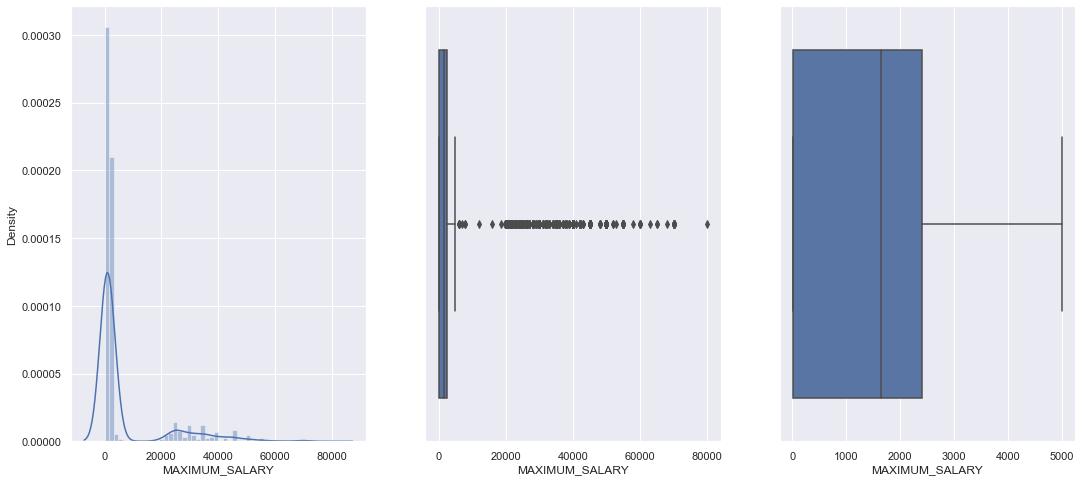

<Figure size 1296x576 with 0 Axes>


Répartition après modification : 


 count    4383.000000
mean     1949.038229
std       795.749266
min        41.960000
25%      1540.000000
50%      1850.800000
75%      2250.000000
max      8000.000000
Name: MAXIMUM_SALARY_mens, dtype: float64 



c:\users\clem0\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\clem0\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\clem0\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarnin

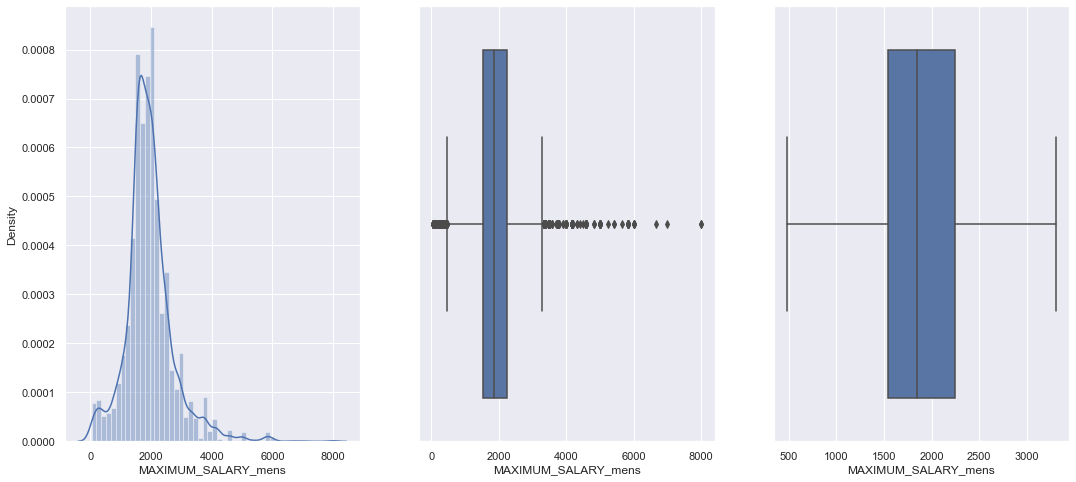

<Figure size 1296x576 with 0 Axes>


Répartition de la VAE créée : 
 0    3237
1    1146
Name: top_max_salary_up_to_2k, dtype: int64



In [61]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer
import pandas as pd
import seaborn as sns
[print(col) for col in df.columns if "salar" in col.lower()]

    
def redress_max_salary_columns(val_max_salary, val_weekly_work_hour):
    if val_max_salary < 100:
        value=val_max_salary * val_weekly_work_hour * 4
    elif val_max_salary > 10000:
        value = val_max_salary/12
    else:
        value=val_max_salary
    return(value)

def compute_vae_salary(df, threshold_salary, graph=False, drop_quanti_var=True):
    if graph==True:
        print("\nRépartition avant modification : \n")
        sns.set(rc = {'figure.figsize':(18, 8)})
        for col in df[["MAXIMUM_SALARY"]] : #ANNUAL_MINIMUM_SALARY MAXIMUM_SALARY
            print(f"\n {df[col].describe()} \n")
            fig, ax =plt.subplots(1,3)
            plt.figure()
            sns.distplot(df[col], ax=ax[0])
            sns.boxplot(df[col], ax=ax[1])
            sns.boxplot(df[col], showfliers = False, ax=ax[2])
            plt.show()
            
    df["MAXIMUM_SALARY_mens"] = df[["WEEKLY_WORKING_HOURS", "MAXIMUM_SALARY"]].apply(lambda row : redress_max_salary_columns(row["MAXIMUM_SALARY"], 
                                                                                             row["WEEKLY_WORKING_HOURS"]),
                                                                                     axis = 1)
    df["top_max_salary_up_to_2k"] = Binarizer(threshold=threshold_salary).fit_transform(df[["MAXIMUM_SALARY_mens"]])
    df["top_max_salary_up_to_2k"] = df["top_max_salary_up_to_2k"].astype(int).astype(str)
    
    if graph==True:
        print("\nRépartition après modification : \n")
        sns.set(rc = {'figure.figsize':(18, 8)})
        for col in df[["MAXIMUM_SALARY_mens"]] : #ANNUAL_MINIMUM_SALARY MAXIMUM_SALARY
            print(f"\n {df[col].describe()} \n")
            fig, ax =plt.subplots(1,3)
            plt.figure()
            sns.distplot(df[col], ax=ax[0])
            sns.boxplot(df[col], ax=ax[1])
            sns.boxplot(df[col], showfliers = False, ax=ax[2])
            plt.show()
            
    if drop_quanti_var == True:
        df.drop(["MAXIMUM_SALARY_mens"], axis=1, inplace=True)
        
    print(f"\nRépartition de la VAE créée : \n {df.top_max_salary_up_to_2k.value_counts()}\n")
    return(df)


df = compute_vae_salary(df, 2200, True, True)

In [110]:
df.top_max_salary_up_to_2k

_id
230007    0
230050    0
230062    0
230114    0
230123    0
         ..
229925    1
229926    1
229928    0
229931    0
229951    0
Name: top_max_salary_up_to_2k, Length: 4383, dtype: object

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
import seaborn as sns

y = df['top_max_salary_up_to_2k']
X = df.drop('top_max_salary_up_to_2k', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# print(X)

In [76]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

# model = make_pipeline(KNNImputer(), SGDClassifier())
numerical_pipeline = make_pipeline(KNNImputer(), RobustScaler())# StandardScaler()
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))

# impute_normal_transfo = make_column_transformer((numerical_pipeline, numerical_features),
#                                                 (categorical_pipeline, categorical_features))
impute_normal_ohe_pipeline = Pipeline([
#     ('preprocess_pipeline', preprocess_pipeline), 
    ('cat_pipeline', categorical_pipeline),
    ('numerical_pipeline',numerical_pipeline)])

model=make_pipeline(impute_normal_ohe_pipeline, 
                    SGDClassifier())
print(model)


# impute_normal_pipe = make_pipeline(impute_normal_transfo)
params = {
    'pipeline__numerical_pipeline__knnimputer__n_neighbors' : [1,2,3,4]
#   , sgdcclassifier_
}
# print(numerical_pipeline)
# print(impute_normal_pipe)
# print(model)


grid_impute_num_knn = GridSearchCV(model, param_grid=params, cv=5)
grid_impute_num_knn.fit(X_train, y_train)
print(f"Best Params : {grid_impute_num_knn.best_params_}")
print(f"Best score : {grid_impute_num_knn.best_score_}")
# grid_impute_num_knn.best_params_["pipeline__numerical_pipeline__knnimputer__n_neighbors"]
# impute_normal_ohe_pipeline.named_steps['numerical_pipeline'].named_steps['knnimputer']
impute_normal_ohe_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('cat_pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))])),
                                 ('numerical_pipeline',
                                  Pipeline(steps=[('knnimputer', KNNImputer()),
                                                  ('robustscaler',
                                                   RobustScaler())]))])),
                ('sgdclassifier', SGDClassifier())])
Best Params : {'pipeline__numerical_pipeline__knnimputer__n_neighbors': 2}
Best score : 0.9726217077718099


Pipeline(steps=[('cat_pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False))])),
                ('numerical_pipeline',
                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                 ('robustscaler', RobustScaler())]))])

In [25]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    SVC(kernel="rbf", C=0.025, probability=True),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[
        ('preprocessor', impute_normal_ohe_pipeline),
        ('classifier', classifier)
    ])
    pipe.set_params(preprocessor__numerical_pipeline__knnimputer__n_neighbors=
                    grid_impute_num_knn.best_params_["pipeline__numerical_pipeline__knnimputer__n_neighbors"])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print(classifier.get_params())
    print("model score: %.3f \n" % pipe.score(X_test, y_test))

SVC(C=0.025, probability=True)
{'C': 0.025, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
model score: 0.733 

RandomForestClassifier()
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
model score: 0.946 

AdaBoostClassifier()
{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}
model score: 0.949 

GradientBoostingClassifier()
{'ccp_alpha': 0.0, 'criterion': 'friedman_ms

In [83]:
# grid_impute_num_knn.best_estimator_.steps.pop(0)
Pipeline(grid_impute_num_knn.best_estimator_.steps[0:1])

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('cat_pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))])),
                                 ('numerical_pipeline',
                                  Pipeline(steps=[('knnimputer',
                                                   KNNImputer(n_neighbors=2)),
                                                  ('robustscaler',
                                                   RobustScaler())]))]))])

In [86]:
from sklearn.model_selection import validation_curve
n_esti = np.arange(350, 400)

classifier_rf = Pipeline(steps=[
                         ('preprocessor', Pipeline(grid_impute_num_knn.best_estimator_.steps[0:1])),
                         ('rf_clf', RandomForestClassifier())
])


grid_params_model = { 
    'rf_clf__n_estimators': [500],
    'rf_clf__max_features': ['auto'], #, 'sqrt', 'log2'
    'rf_clf__max_depth' : [8],
    'rf_clf__criterion' :['gini']}

grid = GridSearchCV(classifier_rf, param_grid=grid_params_model, cv=2)
grid.fit(X_train, y_train)
print("Tuned rg best params: {}".format(grid.best_params_))

# from sklearn.model_selection import cross_val_score
# cross_val_score(classifier_rf, X_train, y_train)

train_score, val_score = validation_curve(grid.best_estimator_, X_train, y_train,
                                          param_name='rf_clf__n_estimators', 
                                          param_range = n_esti, 
                                          cv=5)
# train_scores, test_scores = validation_curve(
#     estimator=rg_cv.best_estimator_, X=X_train, y=y_train, param_name="clf__C", param_range=param_range1,
#     cv=cv, scoring="f1", n_jobs=-1)

print(train_score)
print("Yo")
print(val_score)
plt.plot(n_esti, val_score.mean(axis=1), label='validation')
plt.plot(n_esti, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

Tuned rg best params: {'rf_clf__criterion': 'gini', 'rf_clf__max_depth': 8, 'rf_clf__max_features': 'auto', 'rf_clf__n_estimators': 500}


KeyboardInterrupt: 

In [52]:
from sklearn.model_selection import GridSearchCV


classifier_rf = Pipeline(steps=[
                         ('preprocessor', impute_normal_ohe_pipeline),
                         ('rf_clf', RandomForestClassifier())
])

classifier_rf.set_params(preprocessor__numerical_pipeline__knnimputer__n_neighbors=
                grid_impute_num_knn.best_params_["pipeline__numerical_pipeline__knnimputer__n_neighbors"])

grid_params_model = { 
    'rf_clf__n_estimators': [200,500],
    'rf_clf__max_features': ['auto'], #, 'sqrt', 'log2'
    'rf_clf__max_depth' : [4,8],
    'rf_clf__criterion' :['gini']} # , 'entropy'

CV = GridSearchCV(classifier_rf, grid_params_model) #, n_jobs= 3
                  
CV.fit(X_train, y_train)  
print(CV.best_params_) 
print(CV.best_estimator_) 
print(CV.best_score_)

{'rf_clf__criterion': 'gini', 'rf_clf__max_depth': 8, 'rf_clf__max_features': 'auto', 'rf_clf__n_estimators': 500}
Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('cat_pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))])),
                                 ('numerical_pipeline',
                                  Pipeline(steps=[('knnimputer',
                                                   KNNImputer(n_neighbors=1)),
                                                  ('robustscaler',
                                                   RobustScaler())]))])),
                ('rf_clf',
                 RandomForestCl

In [ ]:
# https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf
# https://blog.ysance.com/page/4
# http://bienvenudansladata.com/tests-statistiques-les-differents-types-de-tests
# https://stackoverflow.com/questions/35632634/how-to-pass-a-parameter-to-only-one-part-of-a-pipeline-object-in-scikit-learn

In [ ]:
numerical_features = make_column_selector(dtype_include=np.number)
print(numerical_features)
categorical_features = make_column_selector(dtype_exclude=np.number)
print(categorical_features)

numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())#RobustScaler()
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

impute_normal_transfo = make_column_transformer((numerical_pipeline, numerical_features),
                                                (categorical_pipeline, categorical_features))


impute_normal_pipe = make_pipeline(impute_normal_transfo)

# impute_normal_transfo.fit_transform(df)[:-1].get_feature_names_out()
# dir(impute_normal_pipe)
# print(impute_normal_pipe)
dir(impute_normal_pipe.fit_transform(df))
print(type(impute_normal_pipe))
print(type(impute_normal_pipe.fit_transform(df)))
print(impute_normal_pipe)

# impute_normal_pipe.transformers_[0][1][1].get_feature_names()
# impute_normal_transfo.get_feature_names()
pd.DataFrame(impute_normal_pipe.fit_transform(df).toarray())

# dir(impute_normal_transfo.named_transformers_['pipeline-2'].named_steps)#.get_feature_names()
# print(dir(impute_normal_pipe.named_steps["columntransformer"]))
# impute_normal_pipe.named_steps["columntransformer"].get_feature_names()


# impute_normal_transfo.named_transformers_['pipeline-1'].named_steps['onehotencoder'].get_feature_names()
# impute_normal_transfo.named_transformers_['pipeline-2'].named_steps['onehotencoder'].get_feature_names()

In [171]:
# model = make_pipeline(preprocessor, SGDClassifier())

SALARY_TYPE_NAME
ANNUAL_MINIMUM_SALARY
SALARY_SUPPLEMENT_NAME_2
SALARY_SUPPLEMENT_NAME_1
MINIMUM_SALARY
SALARY_TYPE_CODE
SALARY_UNIT_CODE
SALARY_SUPPLEMENT_CODE_1
MAXIMUM_SALARY
SALARY_SUPPLEMENT_CODE_2
max_salary_up_to_28k

_id
230007     1971.00
230050     2150.00
230062       15.12
230114       12.00
230123       12.00
            ...   
229925     2600.00
229926    31000.00
229928       10.69
229931       10.65
229951    24000.00
Name: MAXIMUM_SALARY, Length: 4383, dtype: float64

 count     4383.000000
mean      6405.757687
std      12966.132579
min         10.480000
25%         12.000000
50%       1650.000000
75%       2400.000000
max      80000.000000
Name: MAXIMUM_SALARY, dtype: float64 



c:\users\clem0\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\clem0\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\clem0\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarnin

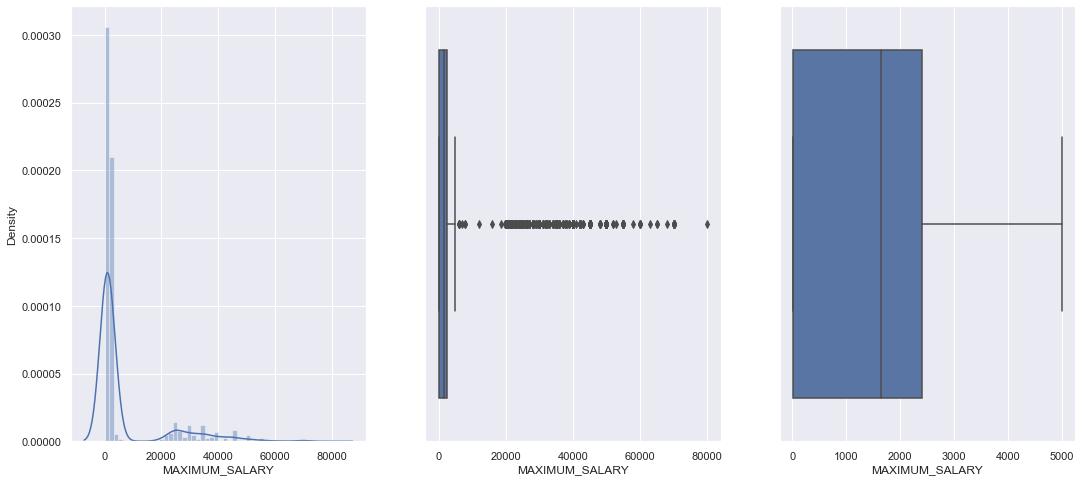

<Figure size 1296x576 with 0 Axes>

In [146]:



# print(type(a))
# pd.Series(a.flatten()).value_counts()
# np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

In [70]:
df.NB_VACANCIES_LEFT.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: NB_VACANCIES_LEFT, dtype: float64

In [33]:
[(print(c,d)) for c, d in zip(df.columns, df.dtypes)]

DISABLED_ACCESSIBILITY float64
ROME_PROFESSION_CARD_NAME object
TRAVEL_TYPE_COMMENT object
TRAVEL_FREQUENCY_NAME object
CITY_NAME float64
LANG_NAME_1 object
LANG_NAME_2 object
DEGREE_TYPE_NAME_2 object
ROME_PROFESSION_CODE object
DESKTOP_TOOLS_NAME_1 float64
TRAVEL_FREQUENCY_COMMENT float64
SUB_CONTINENT_CODE object
LANG_CODE_2 object
COUNTRY_CODE object
LANG_CODE_1 object
EM_INTERVIEW_MODALITY_NAME int64
EXP_DURATION_TYPE_NAME object
NB_MONTH_SALARY float64
CONTRACT_NATURE_CODE object
STATUS_CODE object
SALARY_COMMENT object
CREATION_DATE object
SALARY_TYPE_NAME object
CONTRACT_TYPE_NAME object
DESKTOP_TOOLS_CODE_1 object
DESKTOP_TOOLS_CODE_2 object
WORKING_LOCATION_TYPE_NAME object
ACTIVITY_CODE object
WEEKLY_WORKING_MINUTES float64
SERVICE_TYPE_CODE object
ROME_PROFESSION_CARD_CODE object
DESKTOP_TOOLS_LEV_NAME_2 float64
DESKTOP_TOOLS_LEV_NAME_1 float64
EXPERIENCE_CODE object
NB_VACANCIES_CREATION float64
DEGREE_REQUIRED_CODE_2 object
DEGREE_REQUIRED_CODE_1 object
DEPARTEMENT_CODE o

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [31]:
df.MAXIMUM_SALARY.value_counts().sort_index()

16.5       1
16.56      1
1601       4
1602       1
1606.07    3
          ..
800        2
810        1
900        4
970        1
994        4
Name: MAXIMUM_SALARY, Length: 290, dtype: int64

c:\users\clem0\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\clem0\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MAXIMUM_SALARY', ylabel='Density'>

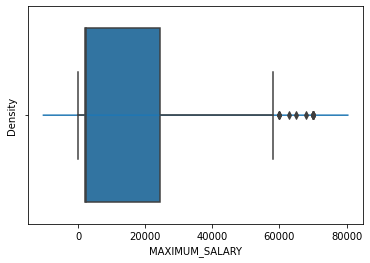

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.distplot(df.MAXIMUM_SALARY.astype(float))
sns.boxplot(df.MAXIMUM_SALARY.astype(float))

In [80]:
print(df.dtypes)

DISABLED_ACCESSIBILITY       float64
ROME_PROFESSION_CARD_NAME     object
TRAVEL_TYPE_COMMENT           object
TRAVEL_FREQUENCY_NAME         object
CITY_NAME                     object
                              ...   
MODIFICATION_DATE             object
STATUS_NAME                   object
WORKING_CONDITION_CODE        object
DESKTOP_TOOLS_LEV_CODE_1      object
EXPERIENCE_MAX_DURATION       object
Length: 128, dtype: object


object     118
float64     10
dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


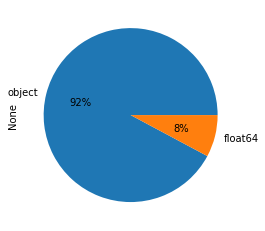

In [81]:
print(df.dtypes.value_counts())
print(df.dtypes.value_counts().plot.pie(autopct='%1.0f%%'))

<AxesSubplot:ylabel='_id'>

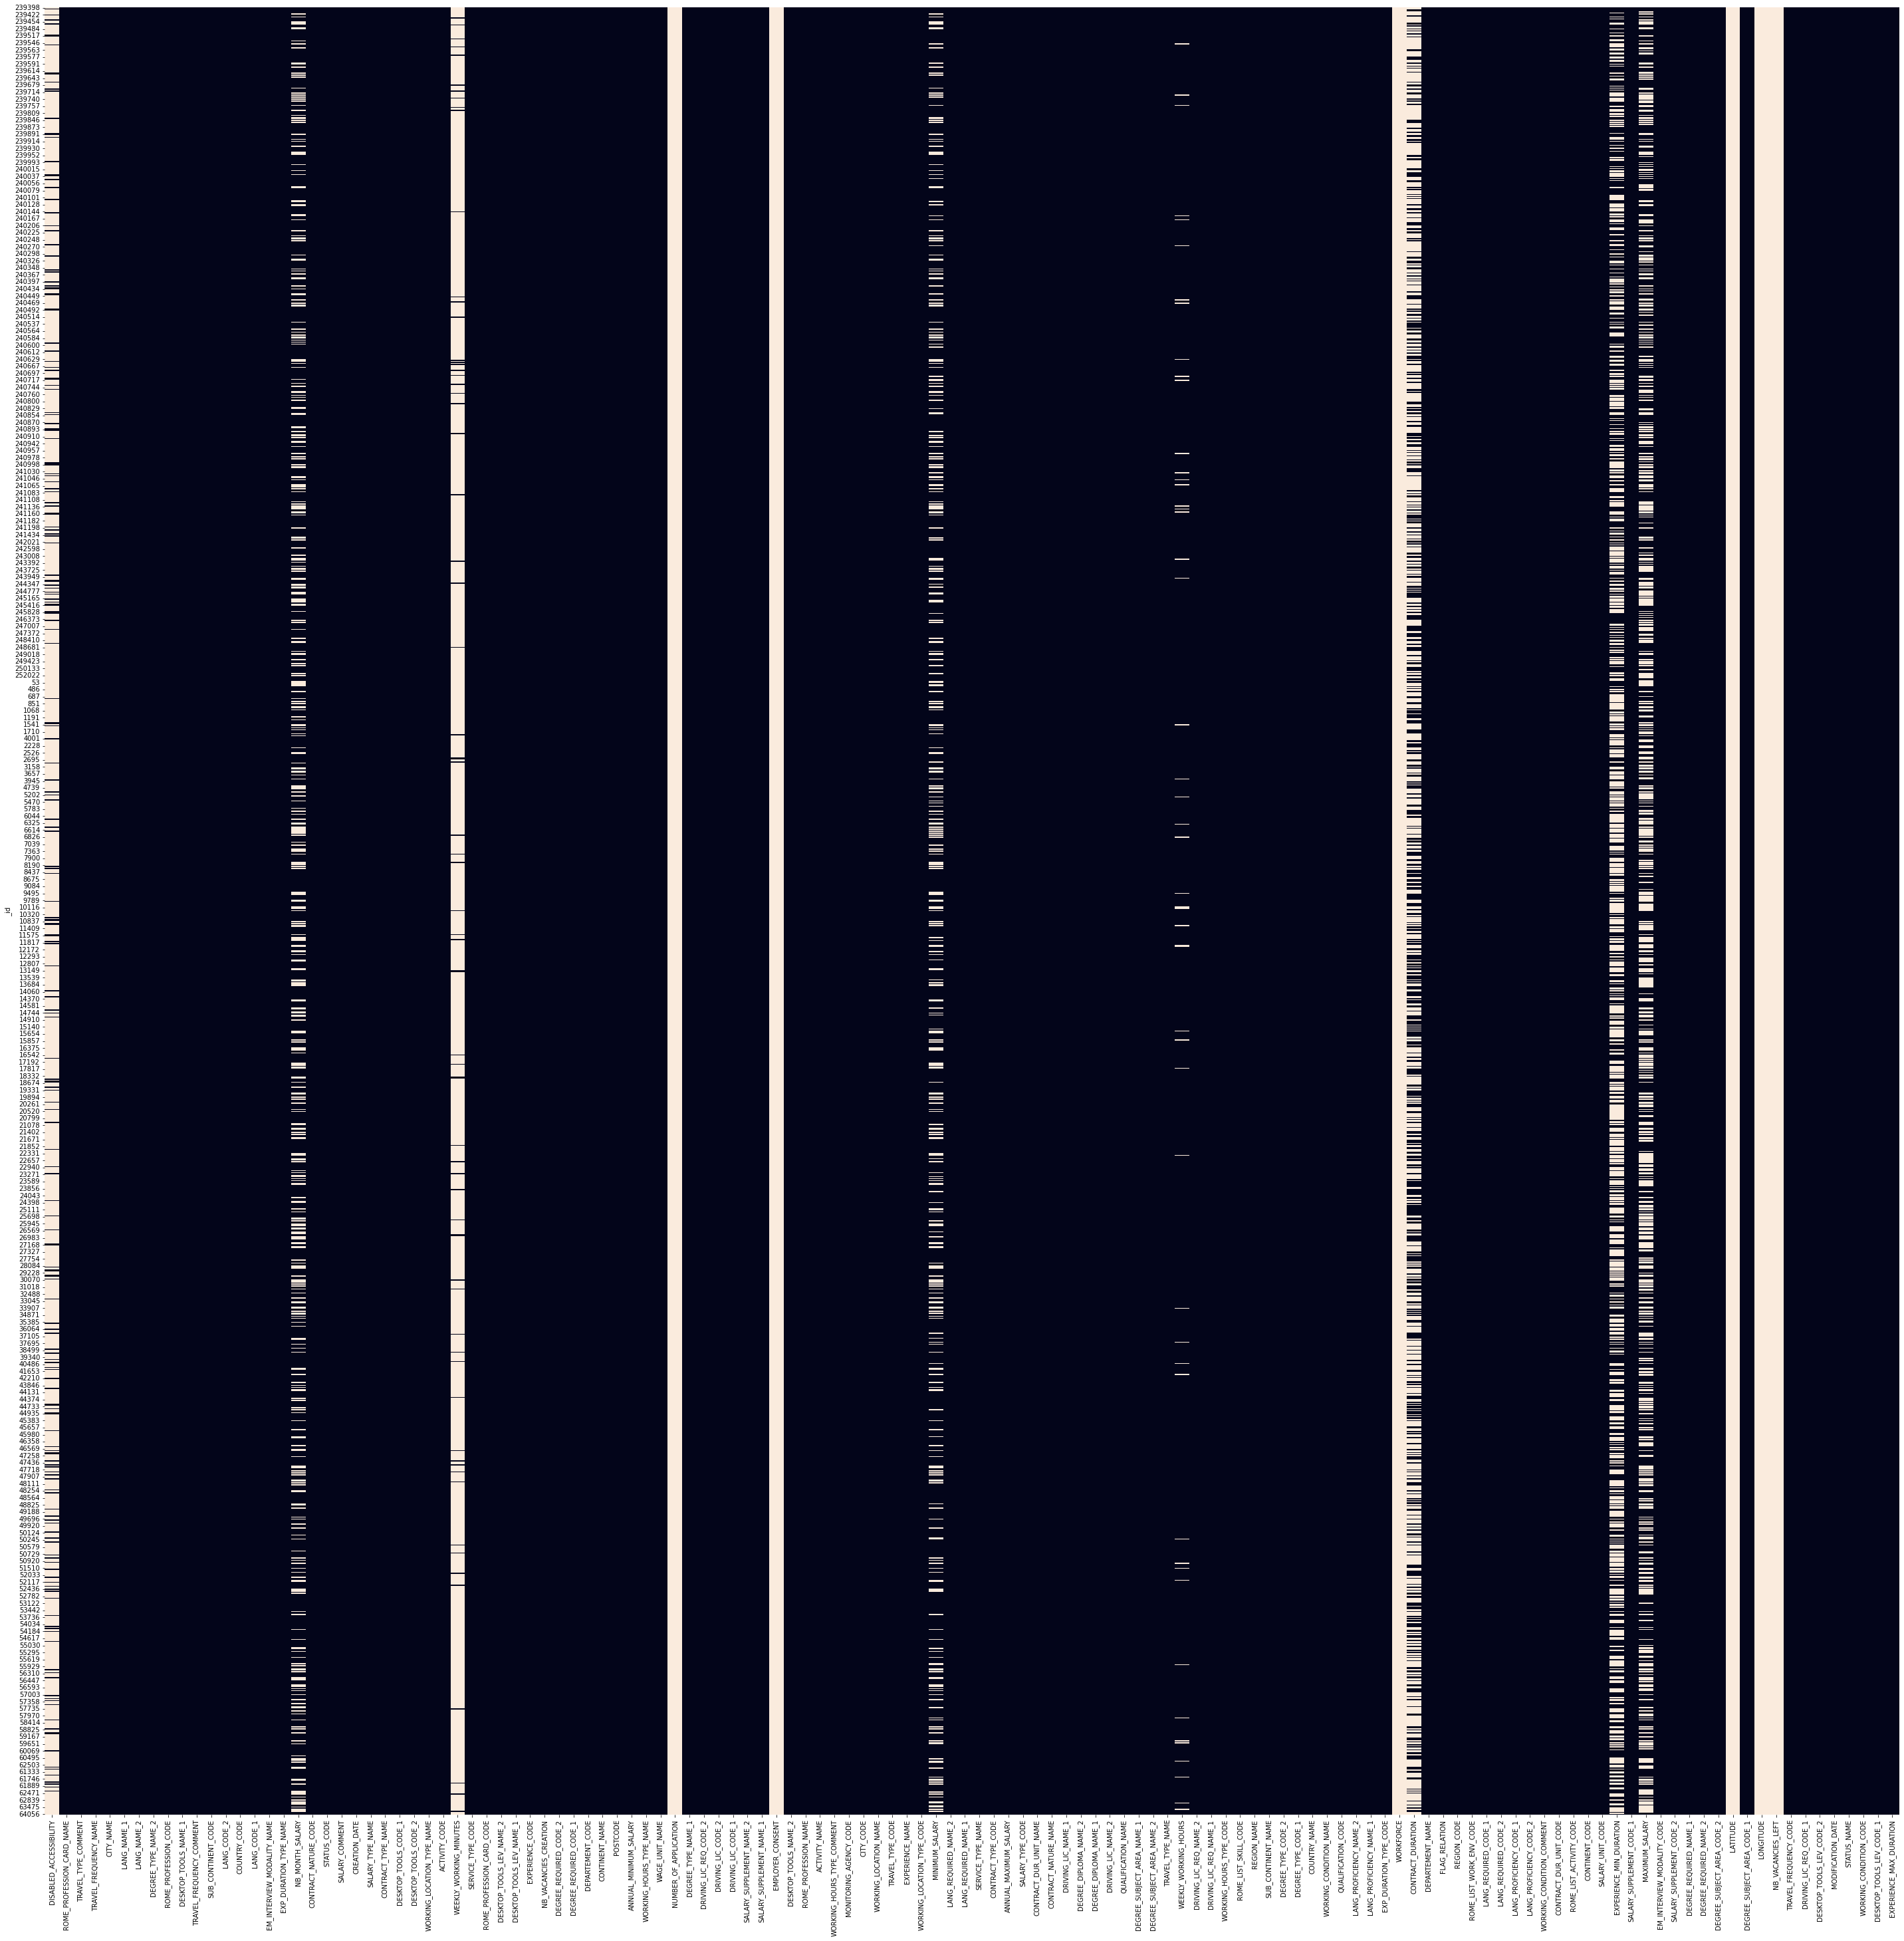

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
sns.heatmap(df.isna(),cbar=False)

In [83]:
missing_rate = (df.isna().sum()/df.shape[0]).sort_values(ascending=False)
print(missing_rate)

def get_variables_with_threshold_nan(df, threshold):
    missing_rate = (df.isna().sum()/df.shape[0]).sort_values(ascending=False)
    series = missing_rate[missing_rate>threshold]
    liste = series.index.tolist()
    print(f"\nListe vars avec plus de {threshold*100} % de nan : \n {liste}")
    return(liste)

get_variables_with_threshold_nan(df, 0.7)
# blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate >0.88)])

WORKFORCE                 1.0
NB_VACANCIES_LEFT         1.0
EMPLOYER_CONSENT          1.0
NUMBER_OF_APPLICATION     1.0
LATITUDE                  1.0
                         ... 
DEGREE_TYPE_CODE_2        0.0
DEGREE_TYPE_CODE_1        0.0
COUNTRY_NAME              0.0
WORKING_CONDITION_NAME    0.0
LANG_REQUIRED_NAME_1      0.0
Length: 128, dtype: float64

Liste vars avec plus de 70.0 % de nan : 
 ['WORKFORCE', 'NB_VACANCIES_LEFT', 'EMPLOYER_CONSENT', 'NUMBER_OF_APPLICATION', 'LATITUDE', 'LONGITUDE', 'WEEKLY_WORKING_MINUTES', 'DISABLED_ACCESSIBILITY']


['WORKFORCE',
 'NB_VACANCIES_LEFT',
 'EMPLOYER_CONSENT',
 'NUMBER_OF_APPLICATION',
 'LATITUDE',
 'LONGITUDE',
 'WEEKLY_WORKING_MINUTES',
 'DISABLED_ACCESSIBILITY']

<AxesSubplot:ylabel='_id'>

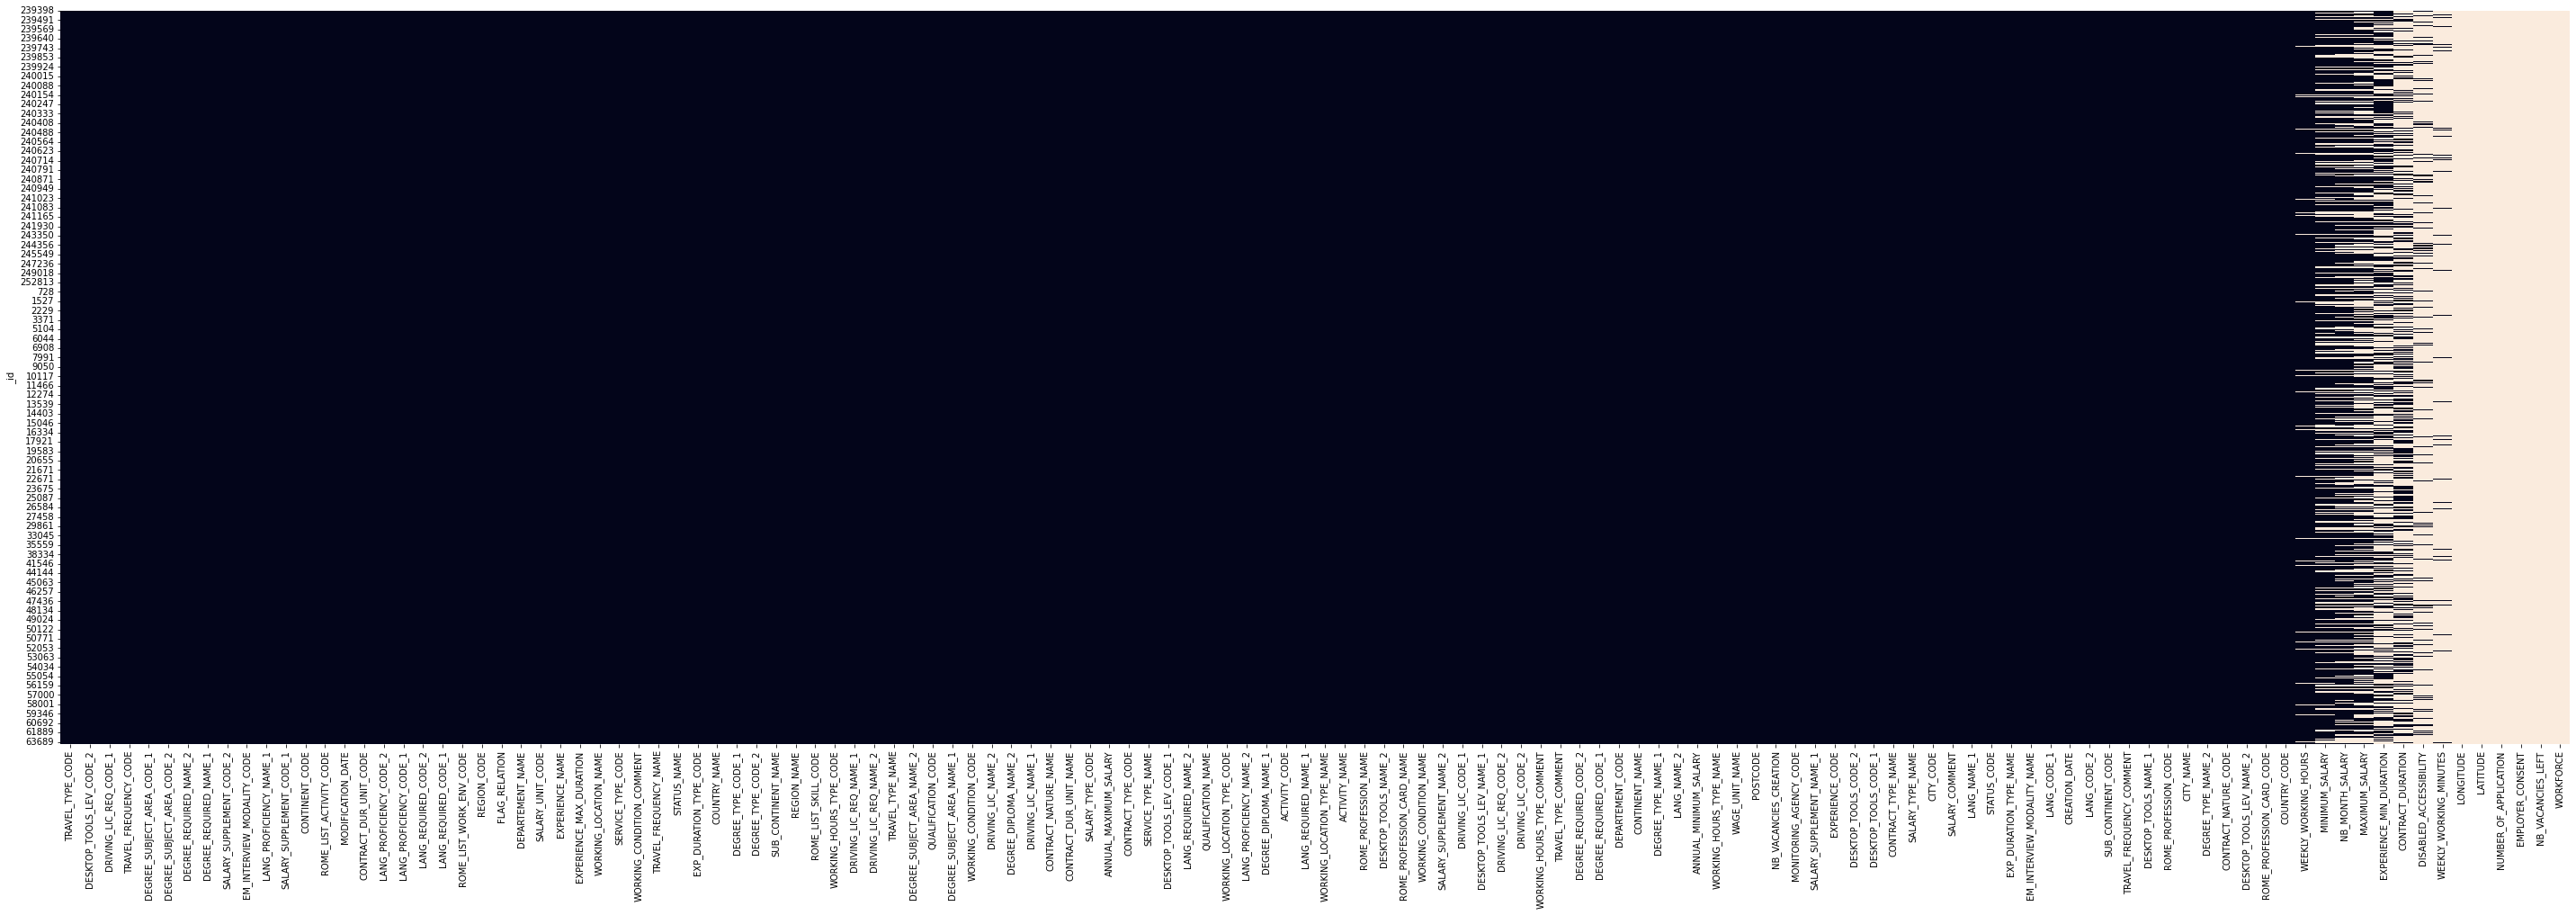

In [84]:
plt.figure(figsize=(50,15))
sns.heatmap(df[missing_rate.sort_values().index.tolist()].isna(),cbar=False)

<AxesSubplot:ylabel='_id'>

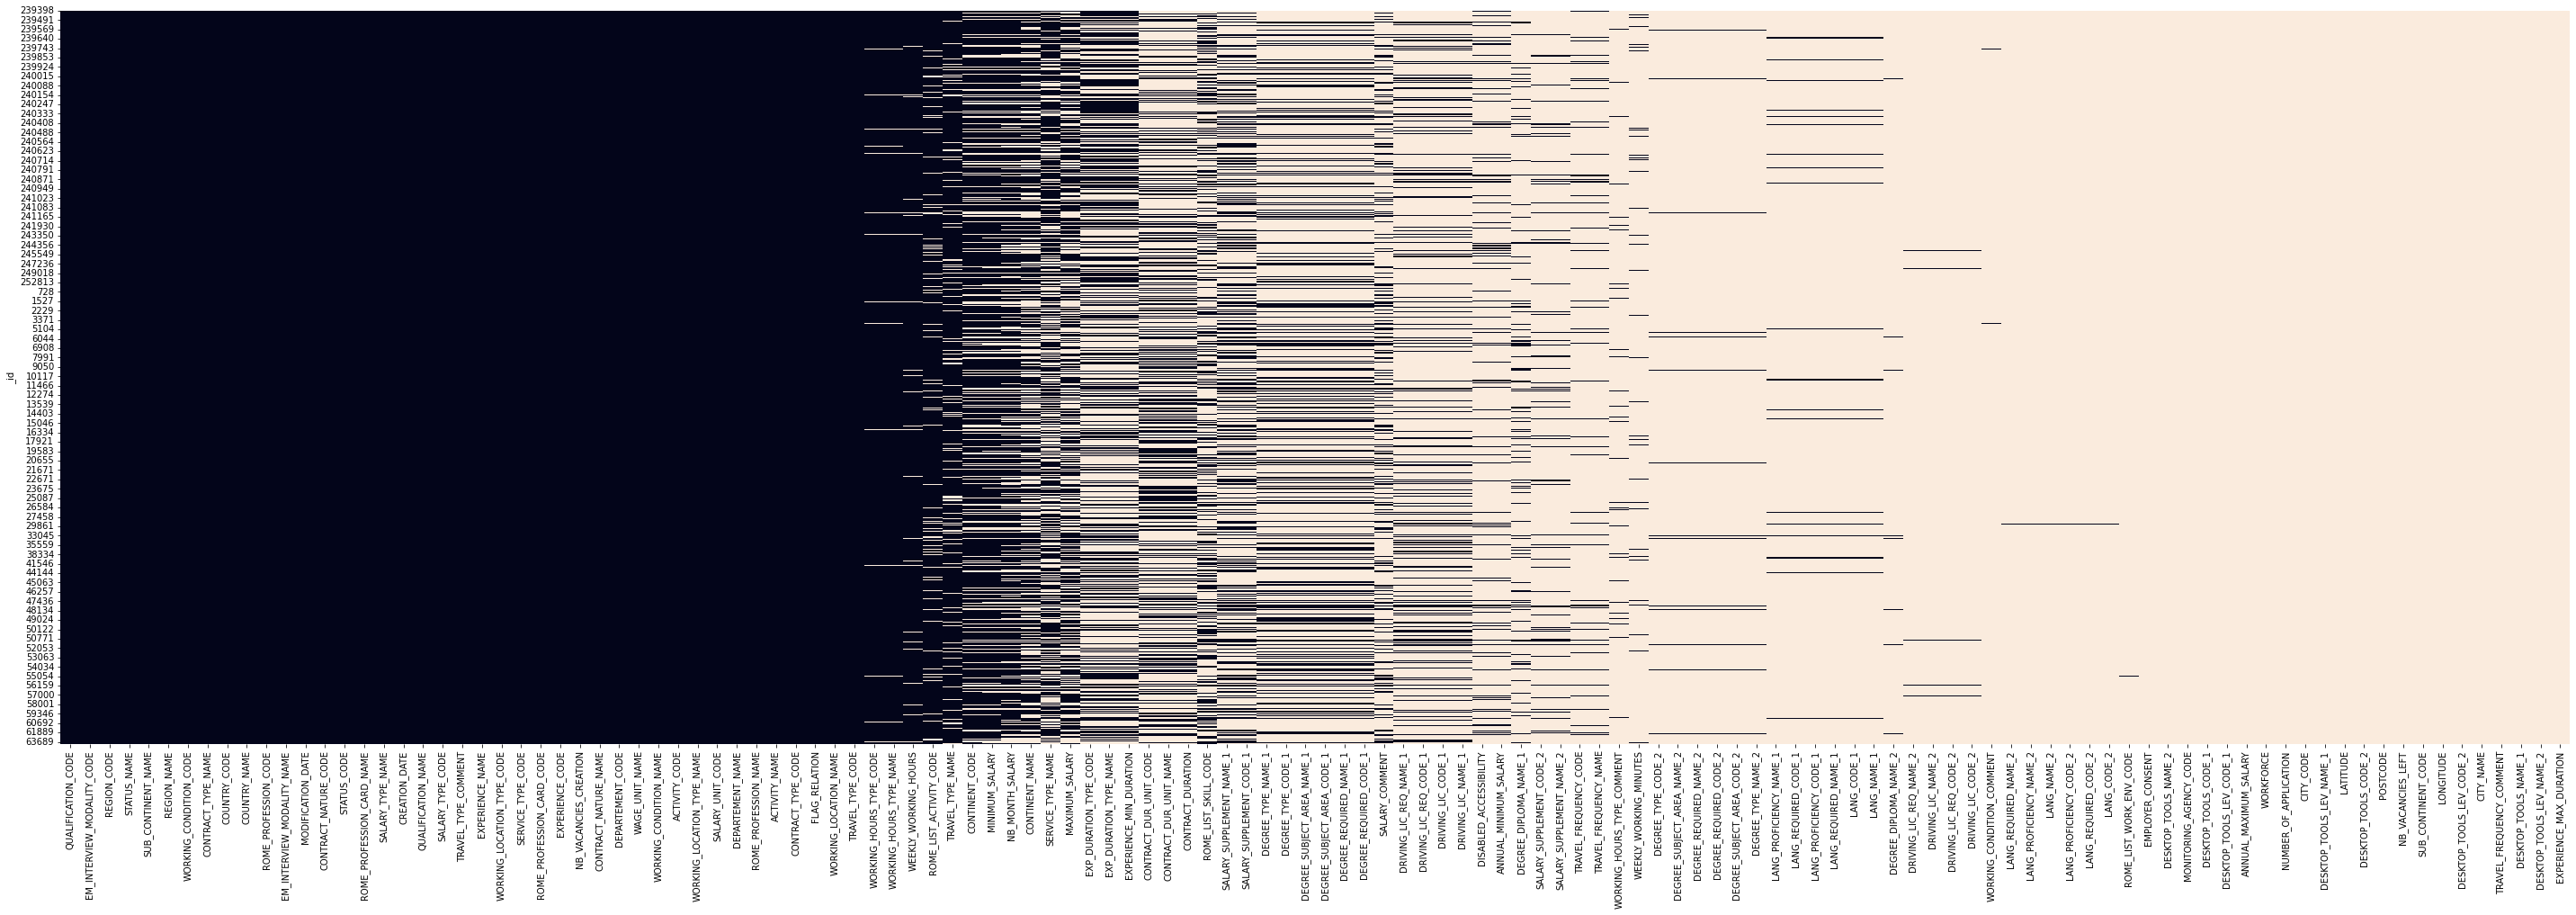

In [85]:
plt.figure(figsize=(50,15))
df = df.replace(r'^\s*$', np.nan, regex=True)
new_missing_rate = (df.isna().sum()/df.shape[0]).sort_values(ascending=False)
sns.heatmap(df[new_missing_rate.sort_values().index.tolist()].isna(),cbar=False)

In [86]:
df.ROME_LIST_WORK_ENV_CODE

_id
239398    NaN
239401    NaN
241921    NaN
239405    NaN
239407    NaN
         ... 
63835     NaN
63871     NaN
63872     NaN
63900     NaN
64056     NaN
Name: ROME_LIST_WORK_ENV_CODE, Length: 1800, dtype: object

In [88]:
# elimination des columns avec un seuil de n
threshold = 0.95

def clean_df_nan(df, threshold):
    return(df[df.columns[df.isna().sum()/df.shape[0]<threshold]])

df = clean_df_nan(df, threshold)

print(df.shape)
df.head()

(1800, 79)


,DISABLED_ACCESSIBILITY,ROME_PROFESSION_CARD_NAME,TRAVEL_TYPE_COMMENT,TRAVEL_FREQUENCY_NAME,ROME_PROFESSION_CODE,COUNTRY_CODE,EM_INTERVIEW_MODALITY_NAME,EXP_DURATION_TYPE_NAME,NB_MONTH_SALARY,CONTRACT_NATURE_CODE,STATUS_CODE,SALARY_COMMENT,CREATION_DATE,SALARY_TYPE_NAME,CONTRACT_TYPE_NAME,WORKING_LOCATION_TYPE_NAME,ACTIVITY_CODE,SERVICE_TYPE_CODE,ROME_PROFESSION_CARD_CODE,EXPERIENCE_CODE,NB_VACANCIES_CREATION,DEGREE_REQUIRED_CODE_1,DEPARTEMENT_CODE,CONTINENT_NAME,ANNUAL_MINIMUM_SALARY,WORKING_HOURS_TYPE_NAME,WAGE_UNIT_NAME,DEGREE_TYPE_NAME_1,DRIVING_LIC_CODE_1,SALARY_SUPPLEMENT_NAME_2,SALARY_SUPPLEMENT_NAME_1,ROME_PROFESSION_NAME,ACTIVITY_NAME,WORKING_LOCATION_NAME,TRAVEL_TYPE_CODE,EXPERIENCE_NAME,WORKING_LOCATION_TYPE_CODE,MINIMUM_SALARY,SERVICE_TYPE_NAME,CONTRACT_TYPE_CODE,SALARY_TYPE_CODE,CONTRACT_DUR_UNIT_NAME,CONTRACT_NATURE_NAME,DRIVING_LIC_NAME_1,DEGREE_DIPLOMA_NAME_1,QUALIFICATION_NAME,DEGREE_SUBJECT_AREA_NAME_1,TRAVEL_TYPE_NAME,WEEKLY_WORKING_HOURS,DRIVING_LIC_REQ_NAME_1,WORKING_HOURS_TYPE_CODE,ROME_LIST_SKILL_CODE,REGION_NAME,SUB_CONTINENT_NAME,DEGREE_TYPE_CODE_1,COUNTRY_NAME,WORKING_CONDITION_NAME,QUALIFICATION_CODE,EXP_DURATION_TYPE_CODE,CONTRACT_DURATION,DEPARTEMENT_NAME,FLAG_RELATION,REGION_CODE,CONTRACT_DUR_UNIT_CODE,ROME_LIST_ACTIVITY_CODE,CONTINENT_CODE,SALARY_UNIT_CODE,EXPERIENCE_MIN_DURATION,SALARY_SUPPLEMENT_CODE_1,MAXIMUM_SALARY,EM_INTERVIEW_MODALITY_CODE,SALARY_SUPPLEMENT_CODE_2,DEGREE_REQUIRED_NAME_1,DEGREE_SUBJECT_AREA_CODE_1,TRAVEL_FREQUENCY_CODE,DRIVING_LIC_REQ_CODE_1,MODIFICATION_DATE,STATUS_NAME,WORKING_CONDITION_CODE
_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
239398,NaN,Administration de systèmes d'information,APP,NaN,200112,01,0,An(s),12.0,E1,EC,NaN,16/11/21,Annuel,CDI,Une commune,7820Z,N,M1801,E,1.0,NaN,44,26000,NaN,Horaires normaux,Euros,NaN,NaN,NaN,NaN,Administrateur / Administratrice système et ré...,Activités des agences de travail temporaire,NANTES,MEL,Expérience exigée,CO,24000.00,NaN,CDI,A,NaN,Contrat tout public,NaN,NaN,Technicien,NaN,Envoyer votre CV par mail,35.0,NaN,NOR,NaN,Pays de la Loire,N,NaN,FRANCE,Autre,7,AN,NaN,LOIRE-ATLANTIQUE,1.0,52,NaN,109971;115801;117024;121044;125902,24000,EU,2.0,NaN,26000.00,En appui,NaN,NaN,NaN,NaN,NaN,16/11/21,Publiée,AUT
239401,3.0,Relation technico-commerciale,APP,Régional,20291,01,0,An(s),12.0,E1,EC,NaN,04/11/21,Annuel,CDI,Une commune,7022Z,N,D1407,E,1.0,NaN,44,45000,Fréquents,Horaires normaux,Euros,NaN,NaN,NaN,NaN,Technico-commercial / Technico-commerciale,Conseil pour les affaires et autres conseils d...,NANTES,MEL,Expérience exigée,CO,35000.00,5,CDI,A,NaN,Contrat tout public,NaN,NaN,Cadre,NaN,Envoyer votre CV par mail,35.0,NaN,NOR,NaN,Pays de la Loire,N,NaN,FRANCE,Autre,9,AN,NaN,LOIRE-ATLANTIQUE,1.0,52,NaN,102318;117180;117243;122460;122709,35000,EU,3.0,NaN,45000.00,En appui,NaN,NaN,NaN,2,NaN,05/11/21,Publiée,AUT
241921,NaN,Encadrement technique en insertion professionn...,APP,NaN,14818,01,0,An(s),12.0,E1,EC,NaN,22/10/21,Mensuel,CDD,Une commune,7830Z,N,K1203,E,1.0,S,44,22877.4,NaN,Horaires normaux,Euros,"CAP, BEP ou équivalent",B,NaN,NaN,Encadrant / Encadrante de chantier d'insertion,Autre mise à disposition de ressources humaines,AIGREFEUILLE SUR MAINE,MEL,Expérience exigée,CO,1906.45,4,CDD,M,Mois,Contrat tout public,B - Véhicule léger,NaN,"Ouvrier qualifié (P3,P4,OHQ)",Travaux paysagers,Envoyer votre CV par mail,35.0,souhaité,NOR,123463,Pays de la Loire,N,NV5,FRANCE,Autre,4,AN,6.0,LOIRE-ATLANTIQUE,1.0,52,MO,107856;122096;122761;123925,22877.4,EU,5.0,NaN,1906.45,En appui,NaN,souhaité,21046,NaN,S,22/10/21,Publiée,AUT
239405,NaN,Information géographique,APP,NaN,20280,01,0,An(s),12.0,E1,EC,NaN,13/09/21,Annuel,Interim,Une commune,7820Z,N,M1808,E,1.0,NaN,44,23000,NaN,Horaires normaux,Euros,NaN,NaN,NaN,NaN,Technicien / Technicienne Systèmes d'Informati...,Activités des agences de travail temporaire,NANTES,MEL,Expérience exigée,CO,21000.00,4,MIS,A,Mois,Contrat tout public,NaN,NaN,Agent de maîtrise,NaN,Envoyer votr

In [105]:
col_date = []
for col in df.columns : 
    if "date" in col.lower():
        col_date.append(col)
        
print(col_date)

['CREATION_DATE', 'MODIFICATION_DATE']


In [ ]:
#Uniformisation de la variable cible et mettre de cote les nan
# creation de top a partir des dates genre extract month / days / year

In [111]:
salaire_columns = [col for col in df.columns if "salary" in col.lower()]
print(salaire_columns)

df[salaire_columns]

def uniformise_salaire(df, col):
    if df[col].isna():
        value = np.nan
    if df[col]< 100:
        value = 

['NB_MONTH_SALARY', 'SALARY_COMMENT', 'SALARY_TYPE_NAME', 'ANNUAL_MINIMUM_SALARY', 'SALARY_SUPPLEMENT_NAME_2', 'SALARY_SUPPLEMENT_NAME_1', 'MINIMUM_SALARY', 'SALARY_TYPE_CODE', 'SALARY_UNIT_CODE', 'SALARY_SUPPLEMENT_CODE_1', 'MAXIMUM_SALARY', 'SALARY_SUPPLEMENT_CODE_2']


,NB_MONTH_SALARY,SALARY_COMMENT,SALARY_TYPE_NAME,ANNUAL_MINIMUM_SALARY,SALARY_SUPPLEMENT_NAME_2,SALARY_SUPPLEMENT_NAME_1,MINIMUM_SALARY,SALARY_TYPE_CODE,SALARY_UNIT_CODE,SALARY_SUPPLEMENT_CODE_1,MAXIMUM_SALARY,SALARY_SUPPLEMENT_CODE_2
_id,,,,,,,,,,,,
239398,12.0,NaN,Annuel,NaN,NaN,NaN,24000.00,A,EU,NaN,26000.00,NaN
239401,12.0,NaN,Annuel,Fréquents,NaN,NaN,35000.00,A,EU,NaN,45000.00,NaN
241921,12.0,NaN,Mensuel,NaN,NaN,NaN,1906.45,M,EU,NaN,1906.45,NaN
239405,12.0,NaN,Annuel,NaN,NaN,NaN,21000.00,A,EU,NaN,23000.00,NaN
239407,12.0,NaN,Mensuel,NaN,NaN,NaN,1744.20,M,EU,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
63835,NaN,NaN,Horaire,NaN,NaN,NaN,10.48,H,EU,NaN,NaN,NaN
63871,NaN,selon grille,Autre,NaN,NaN,Autre,NaN,X,EU,0,NaN,NaN
63872,12.0,NaN,Horaire,NaN,NaN,NaN,10.48,H,EU,NaN,NaN,NaN


c:\users\clem0\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\clem0\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\clem0\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

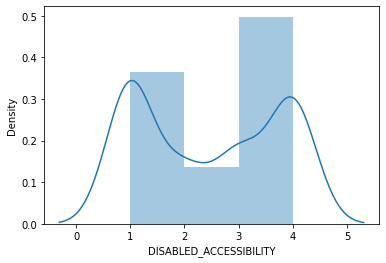

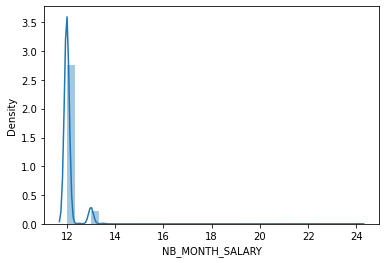

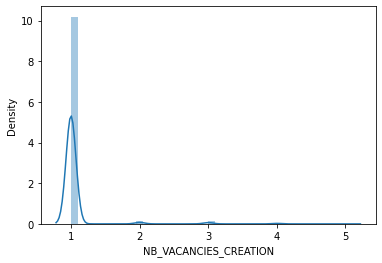

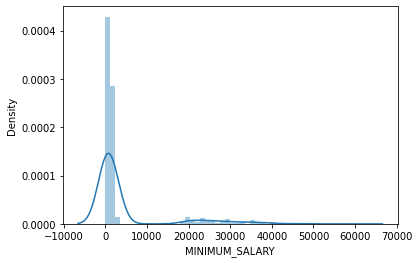

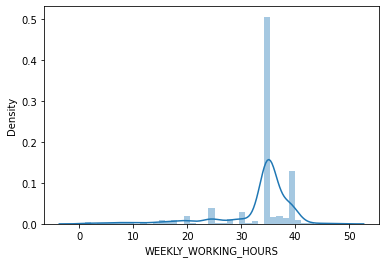

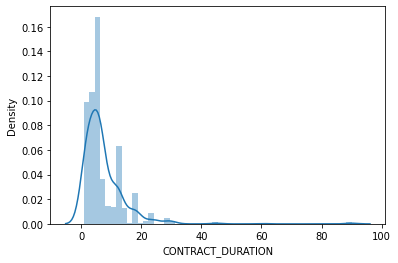

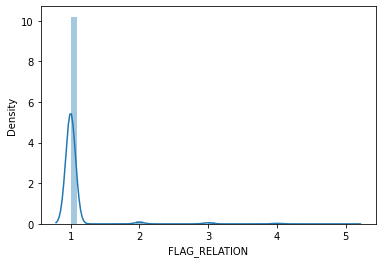

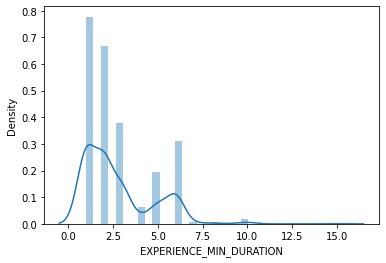

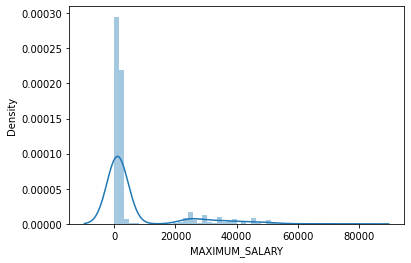

In [89]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [104]:
for col in df.select_dtypes('object'):
    if df[col].nunique() < 100: 
        print(f'\n{col :-<20} {df[col].unique()}')
    else:
        print(f"Nombre de modalités : {str(df[col].nunique())}")

Nombre de modalités : 287

TRAVEL_TYPE_COMMENT- ['APP' 'ACP' 'ACC']

TRAVEL_FREQUENCY_NAME [nan 'Régional' 'Départemental' 'Autre' 'National']
Nombre de modalités : 813

COUNTRY_CODE-------- ['01']

EM_INTERVIEW_MODALITY_NAME ['0' '1']

EXP_DURATION_TYPE_NAME ['An(s)' nan 'Mois']

CONTRACT_NATURE_CODE ['E1' 'E2' 'FS' 'NS' 'FT' 'CU' 'CC' 'CI' 'EE' 'I1']

STATUS_CODE--------- ['EC']
Nombre de modalités : 220

CREATION_DATE------- ['16/11/21' '04/11/21' '22/10/21' '13/09/21' '29/10/21' '19/10/21'
 '20/10/21' '03/11/21' '25/10/21' '11/10/21' '28/10/21' '08/11/21'
 '15/11/21' '12/10/21' '29/09/21' '05/11/21' '09/11/21' '21/10/21'
 '06/11/21' '15/09/21' '26/10/21' '18/10/21' '24/09/21' '16/10/21'
 '02/11/21' '13/07/21' '04/10/21' '07/10/21' '27/10/21' '10/11/21'
 '11/08/21' '30/09/21' '01/06/21' '12/11/21' '11/11/21' '17/06/21'
 '15/10/21' '26/08/21' '28/09/21' '14/10/21' '31/08/21' '20/09/21'
 '08/10/21' '27/09/21' '02/09/21' '18/09/21' '05/10/21' '14/11/21'
 '13/11/21' '13/10/21' '16/09/21

In [101]:
df["ROME_PROFESSION_NAME"].nunique()

813

In [96]:
list_column_object_cst = []
for col in df.select_dtypes('object'):
    if len(df[col].value_counts()) == 1 :
        list_column_object_cst.append(col)
        
    if len(df[col].value_counts()) == 1 or len(df[col].value_counts()) == df.shape[0]:
        display(pd.concat([pd.DataFrame(df[col].value_counts().rename(f"nb_{col}")),
                           pd.DataFrame((df[col].value_counts(normalize=True)*100).rename(f"pct_{col}"))],
                          axis=1))
        list_column_object_cst.append(col)
print(list_column_object_cst)    
        


,nb_COUNTRY_CODE,pct_COUNTRY_CODE
01,1800,100.0


,nb_STATUS_CODE,pct_STATUS_CODE
EC,1800,100.0


,nb_SERVICE_TYPE_CODE,pct_SERVICE_TYPE_CODE
N,1800,100.0


,nb_DEPARTEMENT_CODE,pct_DEPARTEMENT_CODE
44,1800,100.0


,nb_WAGE_UNIT_NAME,pct_WAGE_UNIT_NAME
Euros,1800,100.0


,nb_REGION_NAME,pct_REGION_NAME
Pays de la Loire,1800,100.0


,nb_COUNTRY_NAME,pct_COUNTRY_NAME
FRANCE,1800,100.0


,nb_DEPARTEMENT_NAME,pct_DEPARTEMENT_NAME
LOIRE-ATLANTIQUE,1800,100.0


,nb_REGION_CODE,pct_REGION_CODE
52,1800,100.0


,nb_SALARY_UNIT_CODE,pct_SALARY_UNIT_CODE
EU,1800,100.0


,nb_STATUS_NAME,pct_STATUS_NAME
Publiée,1800,100.0


['COUNTRY_CODE', 'COUNTRY_CODE', 'STATUS_CODE', 'STATUS_CODE', 'SERVICE_TYPE_CODE', 'SERVICE_TYPE_CODE', 'DEPARTEMENT_CODE', 'DEPARTEMENT_CODE', 'WAGE_UNIT_NAME', 'WAGE_UNIT_NAME', 'REGION_NAME', 'REGION_NAME', 'COUNTRY_NAME', 'COUNTRY_NAME', 'DEPARTEMENT_NAME', 'DEPARTEMENT_NAME', 'REGION_CODE', 'REGION_CODE', 'SALARY_UNIT_CODE', 'SALARY_UNIT_CODE', 'STATUS_NAME', 'STATUS_NAME']


In [ ]:
for col in df.select_dtypes('object'):
    plt.figure()
    print(f'\nColonne : {col}')
    df[col].value_counts().plot.pie()
    display(pd.concat([pd.DataFrame(df[col].value_counts().rename(f"nb_{col}")),
                           pd.DataFrame((df[col].value_counts(normalize=True)*100).rename(f"pct_{col}"))],
                          axis=1))
    plt.show()